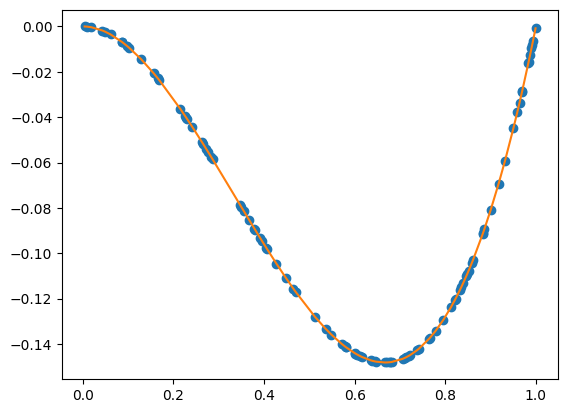

In [219]:
import numpy as np

import matplotlib.pyplot as plt

x_vals = np.random.rand(100)
#print(x)

t_vals = np.asarray([val**3 - val**2 for i,val in enumerate(x_vals)])
#print(t)

plt.plot(x_vals, t_vals, 'o')

z = np.sort(x_vals)
w = [val**3 - val**2 for i,val in enumerate(z)]
plt.plot(z, w)


plt.show()




In [272]:
class Layer:
    def __init__(self, input_units, n_units):
        
        self.bias = np.zeros((1, n_units))
        self.weight = np.random.rand(input_units, n_units)
        
        self.layer_input = None
        self.layer_preactivation = None
        self.layer_activation = None
      
    # 2. method returning each unit’s activation using ReLu as the activation function.
    def forward_step(self, data_in):
        self.layer_input = data_in 
        matrix_mult = data_in.T @ self.weight + self.bias
        matrix_mult = [sum(x) for x in zip(*matrix_mult)]

        self.layer_preactivation = np.transpose(matrix_mult) 
        unit_activation = np.zeros(self.layer_preactivation.shape) 
        for i, val in enumerate(self.layer_preactivation):
            relu = max(0.0, val)
            unit_activation[i] = relu
            
        self.layer_activation = unit_activation 
        
        return unit_activation
    
    # 3. method: updates each unit’s parameters (i.e. weights and bias). 
    def backward_step(self, t, acti, counter, learning_rate):
        
        # partial derivative of activation function
        ReLU_preactivation_der = np.zeros(self.layer_preactivation.shape)
        for ind, val in enumerate(self.layer_preactivation):
            if val <= 0:
                ReLU_preactivation_der[ind] = 0.0
            else:
                ReLU_preactivation_der[ind] = 1.0

        # creating array for weight gradients
        grad_w = np.zeros(self.weight.shape)
        
        # multiplying partial derivatives dCost/dact * dact/dpre 
        if counter == 0:
            self.error = self.layer_activation - t
            grad_b = ReLU_preactivation_der * self.error
        else:
            grad_b = ReLU_preactivation_der * acti
          
        # calculating weight and activation gradients    
        for i in range(len(self.layer_input)):
            for j in range(len(self.layer_activation)):
                grad_w[i,j] = self.layer_input[i] * grad_b[j]
        
        self.grad_i = self.weight @ grad_b
        #self.grad_i = [sum(x) for x in zip(*self.grad_i)]


       

        #update weights and bias
        self.new_weight = self.weight - learning_rate * grad_w
        self.new_bias = self.bias - learning_rate * grad_b
        
        #print(grad_w)
        #print(self.weight)


In [274]:
x = np.random.rand(1)
layer1 = Layer(1,10)
layer2 = Layer(10,1)
t = 1



for i in range(100):
    layer1.forward_step(x)
    #layer2.forward_step(layer1.forward_step(x))
    #layer2.backward_step(t, _, 0, 0.1)
    layer1.backward_step(t, _, 0, 0.1)
    layer1.weight = layer1.new_weight
    #layer2.weight = layer2.new_weight
    print((layer1.forward_step(x)-t)**2)


#print(layer.forward_step(x))
#print(layer.error)
#layer.backward_step([1,1,1], _)
#print(layer.weight - layer.new_weight)

[0.34275924 0.65662853 0.41368118 0.96386073 0.66274875 0.85054681
 0.83747865 0.92369001 0.41738064 0.82190042]
[0.35933331 0.68837971 0.43368467 1.         0.69479587 0.89167489
 0.87797482 0.96835491 0.43756302 0.8616433 ]
[0.37670882 0.72166622 0.45465544 1.         0.72839263 0.93479171
 0.92042917 1.         0.45872132 0.90330794]
[0.39492453 0.75656229 0.47664024 1.         0.76361396 0.97999343
 0.9649364  1.         0.48090273 0.94698727]
[0.41402105 0.79314576 0.49968811 1.         0.8005384  1.
 1.         1.         0.50415672 0.99277871]
[0.43404098 0.83149821 0.52385046 1.         0.83924833 1.
 1.         1.         0.52853515 1.        ]
[0.45502897 0.87170519 0.54918118 1.         0.87983007 1.
 1.         1.         0.55409239 1.        ]
[0.47703184 0.91385638 0.57573676 1.         0.92237413 1.
 1.         1.         0.58088545 1.        ]
[0.50009865 0.95804578 0.60357643 1.         0.96697541 1.
 1.         1.         0.60897409 1.        ]
[0.52428085 1.         

In [284]:
class MLP:
    def __init__(self, input_units, n_units, n_layers, n_outputs):
        self.layers = []
        self.loss = []
        for i in range(n_layers):
            if i == 0:
                self.layers.append(Layer(input_units, n_units))
            elif i == n_layers-1:
                self.layers.append(Layer(n_units, n_outputs))
            else:
                self.layers.append(Layer(n_units, n_units))
        #self.ini_weights = self.layers[0].weight
           

    def forward_steps(self,x):
        '''
        Forward step of the network, returning the output of the last layer.
        '''
        out = x
        for i in range(len(self.layers)):
            out = self.layers[i].forward_step(out)
        return out

 # def forward_steps(self, input):
    #    for i, layer in enumerate(self.layers):
     #       if i == 0:
      #          self.layers[i].forward_step(input)
       #         
        #    else:
         #       self.layers[i].forward_step(self.layers[i-1].layer_activation)
        #   
       # return self.layers[-1].layer_activation
    
    def backpropagation(self, predict, target, l_r):
        l = np.mean(0.5 * (predict - target)**2)
        self.loss.append(l)

        reversed_layers = self.layers[::-1]
        for i, layer in enumerate(reversed_layers):
            if i == 0:
                layer.backward_step(target, _, i, l_r)
            else:
                layer.backward_step(_, reversed_layers[i-1].grad_i, i, l_r)
                
        

                
                
            

In [285]:
x = np.random.rand(100)
target = [1]
mlp = MLP(100, 3, 3, 1)
#print(mlp.forward_steps(x))
#print(mlp.backpropagation(mlp.forward_steps(x)))
#print(mlp.backpropagation(mlp.forward_steps(x)) - mlp.ini_weights)
e = mlp.forward_steps(x)
mlp.backpropagation(e, target, 0.1)
#print(mlp.layers[0].new_weight-mlp.layers[0].weight)




In [287]:
n_layer = 2
learning_rate = 0.1
mlp = MLP(1, 10, n_layer, 1)
loss_array = []
#print(x_vals)
x_vals = np.random.rand(100)
#a = np.expand_dims(np.array([x_vals[0]]), axis = 0)
#t = np.expand_dims(x_vals), axis = 1)


#print(a.shape)
#print(b.shape)

#print(np.expand_dims(np.array([x_vals[0]]), axis = 0) @ np.random.rand(10))
#np.expand_dims(np.array([inputs[i]])
epochs = 100
for i in range(epochs):
    error = 0
    for n in range(len(x_vals)):
        #mlp.forward_steps(np.array(x_vals[n]))
        out = mlp.forward_steps(np.expand_dims(np.array([x_vals[n]]), axis = 0))
        mlp.backpropagation(out, t_vals[n], learning_rate)
        for j in range(n_layer):
            mlp.layers[j].weight = mlp.layers[j].new_weight 
        print(mlp.loss)

print(loss_array)




    
    

[0.018379473294807533]
[0.018379473294807533, 0.2298802439839633]
[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524]
[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524, 1.2552580390363486]
[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524, 1.2552580390363486, 0.2662769721876347]
[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524, 1.2552580390363486, 0.2662769721876347, 0.15565743678789903]
[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524, 1.2552580390363486, 0.2662769721876347, 0.15565743678789903, 0.5559821842149169]
[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524, 1.2552580390363486, 0.2662769721876347, 0.15565743678789903, 0.5559821842149169, 2.4447162158680795]
[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524, 1.2552580390363486, 0.2662769721876347, 0.15565743678789903, 0.5559821842149169, 2.4447162158680795, 3.6994253691633743]
[0.018379473294807533, 0.2298802439839633, 0.002

C:\Users\jaspe\AppData\Local\Temp\ipykernel_7840\2019127472.py:35: RuntimeWarning: overflow encountered in square
  l = np.mean(0.5 * (predict - target)**2)
C:\Users\jaspe\AppData\Local\Temp\ipykernel_7840\1106289948.py:53: RuntimeWarning: overflow encountered in matmul
  self.grad_i = self.weight @ grad_b
C:\Users\jaspe\AppData\Local\Temp\ipykernel_7840\1106289948.py:14: RuntimeWarning: overflow encountered in matmul
  matrix_mult = data_in.T @ self.weight + self.bias


[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524, 1.2552580390363486, 0.2662769721876347, 0.15565743678789903, 0.5559821842149169, 2.4447162158680795, 3.6994253691633743, 0.6981519849140927, 4.240236235986054, 3.668416709203364, 1.07336389798281, 4.671183790443578, 0.5725390116920785, 10.598876745598435, 18.34280035901116, 6.663643976924648, 3.609523646044869, 117.09302522662108, 0.004836252120155322, 2560.813331037312, 5728389.118389215, 2.2242864800382412e+16, 7.49419390119737e+44, 1.8216336941078664e+130, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[0.018379473294807533, 0.2298802439839633, 0.0022319903475198524, 1.2552580390363486, 0.2662769721876347, 0.15565743678789903, 0.5559821842149169, 2.4447162158680795, 3.6994253691633743, 0.6981519849140927, 4.240236235986054, 3.668416709203364, 1.07336389798281, 4.671183790443578, 0.5725390116920785, 10.598876745598435, 18.34280035901116, 6.663643976924648, 3.609523646044869, 117.09302522662108, 0.004836252120155322, 2560.813331037312, 5728389.118389215, 2.2242864800382412e+16, 7.49419390119737e+44, 1.8216336941078664e+130, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 

In [69]:
#testing matrixes and numpy

import numpy as np 

w_M = np.random.rand(3, 5)
bi_v = np.zeros(5)
a = [3,2,5]
c = [1,1,1]
print(a[0]-c[0])
b = np.zeros(w_M.shape)

print(b)
print(w_M)
print(w_M[2,3])

print(bi_v)
print((a @ w_M) + bi_v)




2
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0.05165245 0.71592494 0.49629912 0.25064918 0.91322038]
 [0.76817697 0.99288596 0.54713408 0.68210515 0.89681847]
 [0.03889652 0.73643262 0.68480453 0.99595527 0.5498001 ]]
0.9959552697545699
[0. 0. 0. 0. 0.]
[1.88579391 7.81570984 6.00718817 7.09593418 7.28229857]
